<a href="https://colab.research.google.com/github/korede97/Hamoye_ML_Externship/blob/main/Regression_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns


In [47]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


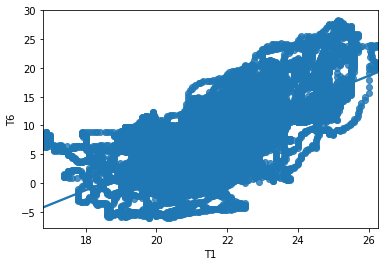

In [48]:
sns.regplot(x='T1', y = 'T6', data=df)


In [92]:
x = df[['T1']]
y = df[['T6']]
y

,T6
0,7.026667
1,6.833333
2,6.560000
3,6.433333
4,6.366667
...,...
19730,24.796667
19731,24.196667
19732,23.626667
19733,22.433333


In [50]:
df.drop(['date'], axis = 1, inplace = True)

In [100]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['T1', 'T6'])
outside_target = normalised_df['T6']


# split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, outside_target, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
y_pred = linear_model.predict(x_test)

In [101]:
# R^2
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
round(r2_score,2)

0.97

In [102]:
# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
round(mae,2)

0.02

In [103]:
# RSS 
import numpy as np
rss = np.sum(np.square(y_test - y_pred))
round(rss, 3)	 

5.781

In [104]:
#RMSE
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 3) 	

0.031

In [110]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,RH_6,-0.107145
1,T5,-0.102151
2,Tdewpoint,-0.092181
3,T8,-0.087979
4,RH_3,-0.075474
5,T7,-0.057902
6,T4,-0.054840
7,T3,-0.040642
8,RH_8,-0.038211
9,Press_mm_hg,-0.024660


In [106]:
linear_model_weights.sort_index()

,Features,Linear_Model_Weight
0,RH_6,-0.107145
1,T5,-0.102151
2,Tdewpoint,-0.092181
3,T8,-0.087979
4,RH_3,-0.075474
5,T7,-0.057902
6,T4,-0.054840
7,T3,-0.040642
8,RH_8,-0.038211
9,Press_mm_hg,-0.024660


In [114]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [115]:
y_pred_ridge = ridge_reg.predict(x_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

round(rmse_ridge, 3) 	

0.031

In [116]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,RH_6,-0.055060
1,T8,-0.000819
2,Appliances,0.000000
3,Visibility,-0.000000
4,Windspeed,0.000000
5,RH_out,-0.000000
6,Press_mm_hg,-0.000000
7,RH_9,0.000000
8,T9,-0.000000
9,RH_8,0.000000


In [121]:
y_pred_lasso = lasso_reg.predict(x_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

round(rmse_lasso, 3) 	

0.037